In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Importar la regresión lineal
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
# Cargar conjuntos de características
X_train = pd.read_csv("Data/processedInv/X_train.csv")
X_test = pd.read_csv("Data/processedInv/X_test.csv")

# Cargar conjuntos de la variable objetivo
y_train = pd.read_csv("Data/processedInv/y_train.csv")
y_test = pd.read_csv("Data/processedInv/y_test.csv")

In [17]:
print("Conjunto de entrenamiento (X_train) dimensiones:", X_train.shape)
print("Conjunto de prueba (X_test) dimensiones:", X_test.shape)
print("Variable objetivo entrenamiento (y_train) dimensiones:", y_train.shape)
print("Variable objetivo prueba (y_test) dimensiones:", y_test.shape)

Conjunto de entrenamiento (X_train) dimensiones: (474, 16)
Conjunto de prueba (X_test) dimensiones: (474, 16)
Variable objetivo entrenamiento (y_train) dimensiones: (474, 1)
Variable objetivo prueba (y_test) dimensiones: (474, 1)


In [18]:
X_train.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,0.436689,0.407864,0.528148,-1.118414,0.783478,1.061951,0.739598,-1.786511,1.455967,1.839092,3,0.125855,True,True,False,False
1,1.258067,-0.455482,-0.255218,0.704540,-0.890427,0.925400,1.264598,-1.354939,0.122330,0.743295,3,-0.365324,False,False,False,True
2,0.929516,-1.040482,-1.743613,0.183696,-0.192966,-0.576656,0.185432,1.282444,-0.711193,-0.352502,1,-0.284212,False,True,False,False
3,0.765240,1.936411,1.076504,-0.423955,-0.192966,-0.849757,0.302098,-0.619669,1.622671,-0.352502,1,1.246403,True,False,False,False
4,-1.206066,-0.196007,0.214802,-1.205221,0.155764,-0.303555,0.447932,1.202523,-1.044602,-0.352502,1,-0.323266,False,False,False,False


In [19]:
y_train.head()

,Calories_Burned
0,1159.0
1,996.0
2,838.0
3,949.0
4,1029.0


In [20]:
# Convertir columnas booleanas a enteros
bool_columns = ['Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']
X_train[bool_columns] = X_train[bool_columns].astype(int)
X_test[bool_columns] = X_test[bool_columns].astype(int)

In [ ]:
# Inicializar el modelo de regresión lineal
regressor = LinearRegression()

# Ajustar el modelo de regresión lineal con los datos de entrenamiento
regressor.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f'Pérdida (MSE) en el conjunto de prueba: {mse:.4f}')
print(f'Error Absoluto Medio (MAE) en el conjunto de prueba: {mae:.4f}')
print(f'Coeficiente de Determinación (R²) en el conjunto de prueba: {r2:.4f}')

Pérdida (MSE) en el conjunto de prueba: 1676.5007
Error Absoluto Medio (MAE) en el conjunto de prueba: 31.0224
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9787


In [23]:
comparison = pd.DataFrame({'Real': y_test.values.flatten(), 'Predicho': y_pred.flatten()})

# Mostrar las primeras 10 filas
print(comparison.head(10))


     Real     Predicho
0   354.0   273.304617
1   636.0   641.286085
2   678.0   639.029023
3  1688.0  1569.810788
4   962.0   990.980706
5   695.0   725.564258
6   813.0   803.308708
7   804.0   803.657081
8   598.0   558.281987
9  1163.0  1221.106496


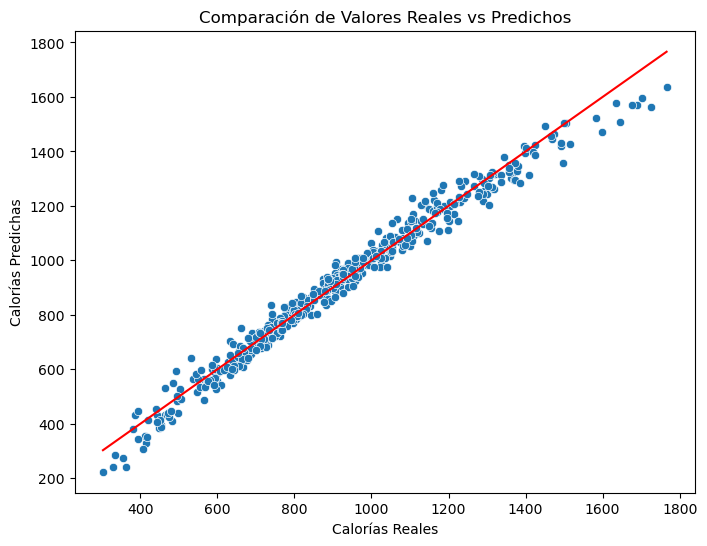

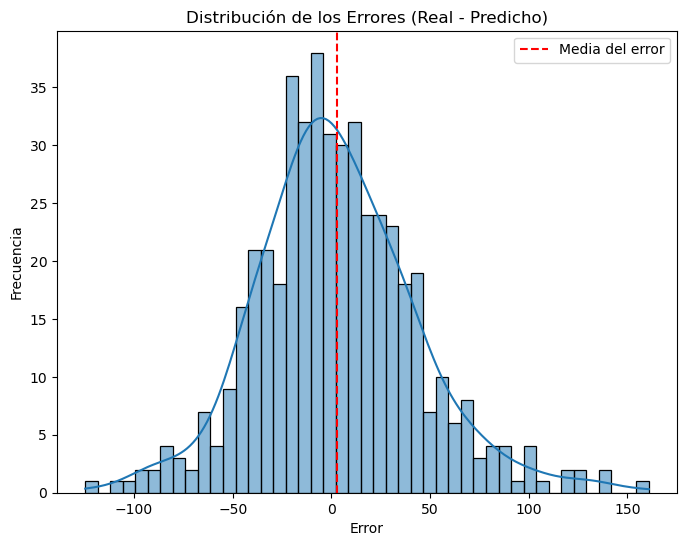

In [24]:
# Gráfico de dispersión Real vs Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real', y='Predicho', data=comparison)
plt.title('Comparación de Valores Reales vs Predichos')
plt.xlabel('Calorías Reales')
plt.ylabel('Calorías Predichas')
plt.plot([comparison['Real'].min(), comparison['Real'].max()], 
         [comparison['Real'].min(), comparison['Real'].max()], 
         color='red')  # Línea de referencia
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(comparison['Real'] - comparison['Predicho'], bins=45, kde=True)
plt.axvline((comparison['Real'] - comparison['Predicho']).mean(), color='red', linestyle='--', label='Media del error')
plt.title('Distribución de los Errores (Real - Predicho)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [ ]:
print(f'Pérdida (MSE) en el conjunto de prueba: {mse:.4f}')
print(f'Error Absoluto Medio (MAE) en el conjunto de prueba: {mae:.4f}')
print(f'Coeficiente de Determinación (R²) en el conjunto de prueba: {r2:.4f}')

Pérdida (MSE) en el conjunto de prueba: 1676.5007
Error Absoluto Medio (MAE) en el conjunto de prueba: 31.0224
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9787


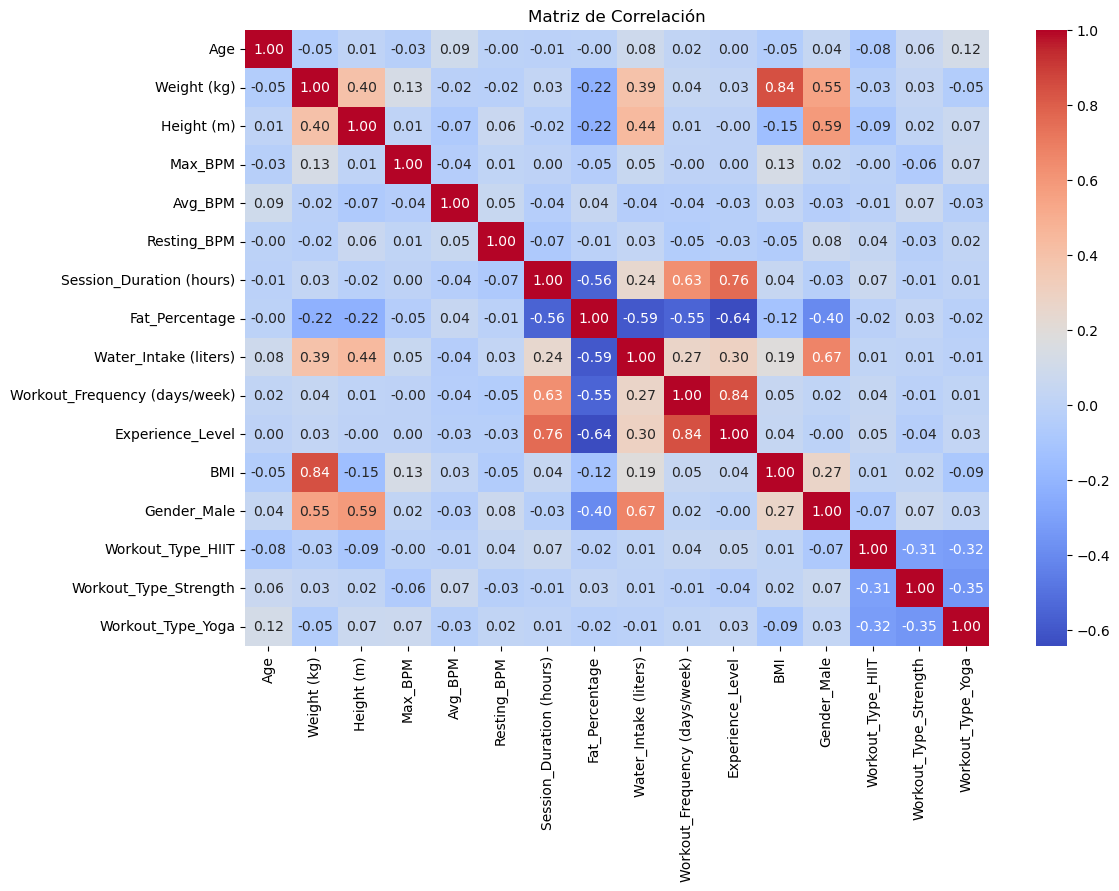

In [25]:
# Generar la matriz de correlación
correlation_matrix = X_train.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [26]:
# Asegúrate de usar solo variables numéricas
X_train_num = X_train.select_dtypes(include=['number'])

# Calcular VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_num.columns
vif["VIF"] = [variance_inflation_factor(X_train_num.values, i) 
              for i in range(X_train_num.shape[1])]

# Mostrar el resultado
print(vif.sort_values(by="VIF", ascending=False))


                         Variable        VIF
1                     Weight (kg)  74.303605
11                            BMI  65.322876
2                      Height (m)  23.607291
10               Experience_Level   5.813555
12                    Gender_Male   5.173890
7                  Fat_Percentage   2.412912
8           Water_Intake (liters)   2.398359
9   Workout_Frequency (days/week)   2.219180
6        Session_Duration (hours)   2.146551
15              Workout_Type_Yoga   2.034781
14          Workout_Type_Strength   1.929031
13              Workout_Type_HIIT   1.785387
0                             Age   1.063607
3                         Max_BPM   1.038119
4                         Avg_BPM   1.026254
5                     Resting_BPM   1.023643


In [27]:
columns_to_drop = ['BMI', 'Experience_Level']

for col in columns_to_drop:
    if col in X_train.columns:
        X_train = X_train.drop(columns=columns_to_drop)
        X_test = X_test.drop(columns=columns_to_drop)
    else:
        print(f"La columna {col} no existe en los datos.")

La columna Experience_Level no existe en los datos.


In [28]:
# Inicializar el modelo de regresión lineal
regressor = LinearRegression()

# Ajustar el modelo de regresión lineal con los datos de entrenamiento
regressor.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f'Pérdida (MSE) en el conjunto de prueba: {mse:.4f}')
print(f'Error Absoluto Medio (MAE) en el conjunto de prueba: {mae:.4f}')
print(f'Coeficiente de Determinación (R²) en el conjunto de prueba: {r2:.4f}')

Pérdida (MSE) en el conjunto de prueba: 1681.1151
Error Absoluto Medio (MAE) en el conjunto de prueba: 30.9233
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9786


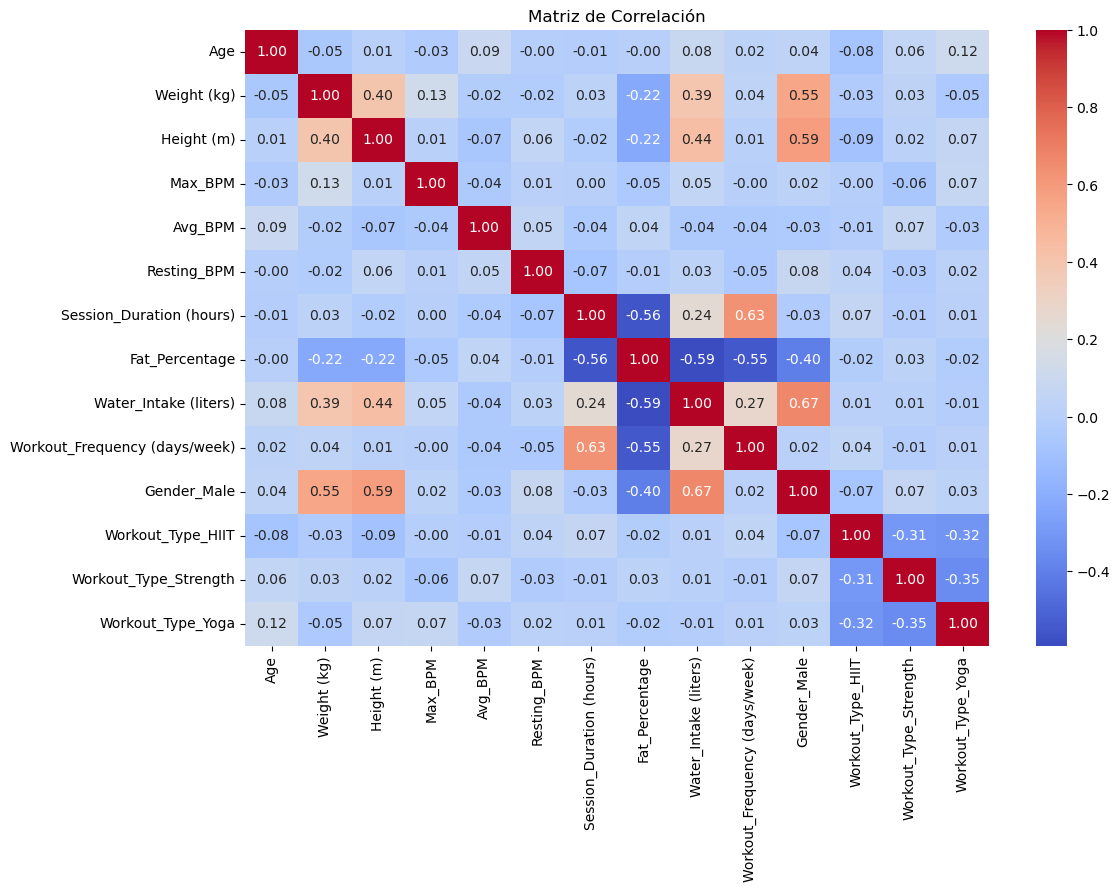

In [30]:
# Generar la matriz de correlación
correlation_matrix = X_train.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [31]:
# Asegúrate de usar solo variables numéricas
X_train_num = X_train.select_dtypes(include=['number'])

# Calcular VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_num.columns
vif["VIF"] = [variance_inflation_factor(X_train_num.values, i) 
              for i in range(X_train_num.shape[1])]

# Mostrar el resultado
print(vif.sort_values(by="VIF", ascending=False))

                         Variable       VIF
10                    Gender_Male  3.354679
7                  Fat_Percentage  2.410809
8           Water_Intake (liters)  2.256648
6        Session_Duration (hours)  1.974206
9   Workout_Frequency (days/week)  1.860684
13              Workout_Type_Yoga  1.586526
12          Workout_Type_Strength  1.565236
2                      Height (m)  1.502074
1                     Weight (kg)  1.443860
11              Workout_Type_HIIT  1.374792
0                             Age  1.051114
3                         Max_BPM  1.037928
4                         Avg_BPM  1.025677
5                     Resting_BPM  1.021823


In [32]:
# Comparar los valores reales y predichos
comparison = pd.DataFrame({'Real': y_test.values.flatten(), 'Predicho': y_pred.flatten()})
print(comparison.head(10))

     Real     Predicho
0   354.0   273.457415
1   636.0   638.631876
2   678.0   638.949598
3  1688.0  1567.661710
4   962.0   993.558752
5   695.0   722.761327
6   813.0   799.318513
7   804.0   805.391076
8   598.0   558.314489
9  1163.0  1225.172116


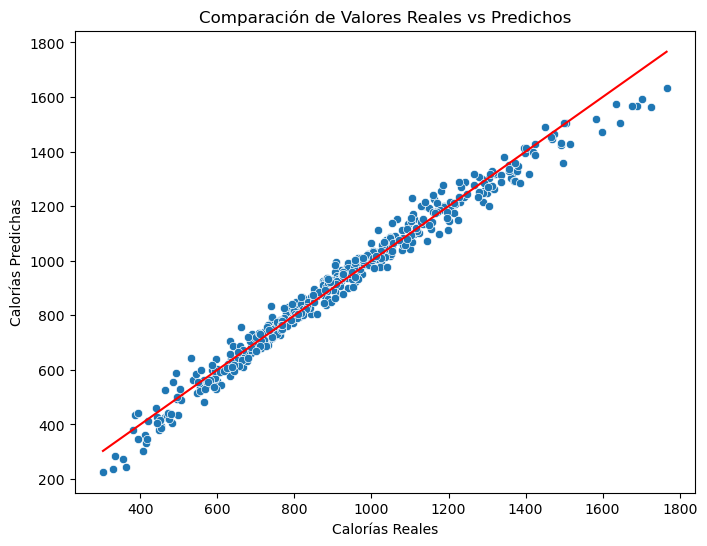

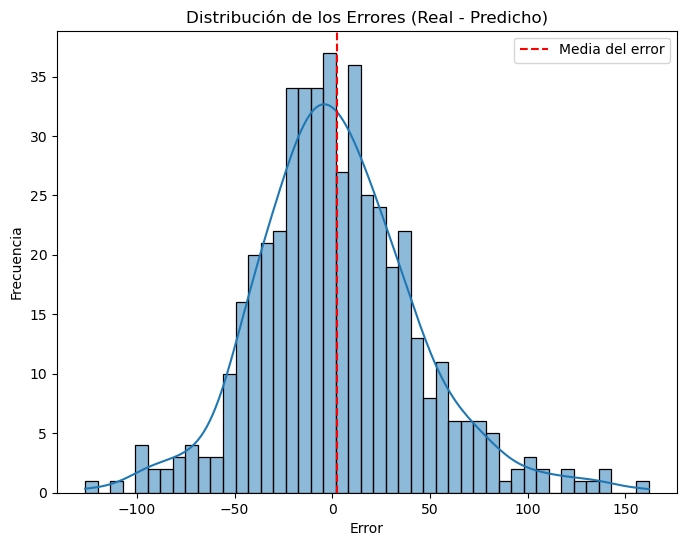

In [33]:
# Gráfico de dispersión Real vs Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real', y='Predicho', data=comparison)
plt.title('Comparación de Valores Reales vs Predichos')
plt.xlabel('Calorías Reales')
plt.ylabel('Calorías Predichas')
plt.plot([comparison['Real'].min(), comparison['Real'].max()], 
         [comparison['Real'].min(), comparison['Real'].max()], 
         color='red')  # Línea de referencia
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(comparison['Real'] - comparison['Predicho'], bins=45, kde=True)
plt.axvline((comparison['Real'] - comparison['Predicho']).mean(), color='red', linestyle='--', label='Media del error')
plt.title('Distribución de los Errores (Real - Predicho)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()